## Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

## Load Dataset

In [2]:
# Read Dataset
data = pd.read_csv('dataset.csv')

data.head()

,content,date,title,label
0,Berita SurabayaSURYA.co.id | SURABAYA - Pengem...,"Jumat, 10 Juni 2022 01:08",PT Intiland Development Kembangkan Kawasan Ind...,noclickbait
1,Berita SurabayaSURYA.co.id | SURABAYA - Brand ...,"Jumat, 10 Juni 2022 01:16",ANKER Menangkan Penghargaan Nobel Prize di Aja...,noclickbait
2,Berita SurabayaSURYA.co.id | SURABAYA - PT Har...,"Jumat, 10 Juni 2022 01:27","Perluas Bisnis, Hartadinata Abadi Store Buka G...",noclickbait
3,Berita SurabayaSURYA.co.id | SURABAYA – Peneri...,"Jumat, 10 Juni 2022 01:34","PPDB SMP Dibuka Hari Ini, Dindik Surabaya Mint...",clickbait
4,"SURYA.co.id I Masih ingat Ronaldo Nazario, san...","Jumat, 10 Juni 2022 01:51","Liga Spanyol, Ronaldo Legenda Real Madrid, Jad...",clickbait


In [3]:
data.describe(include='all')

,content,date,title,label
count,1600,1600,1600,1600
unique,1596,1532,1595,2
top,"SURYA.CO.ID, LAMONGAN - Kawasan Pantura (Panta...","Kamis, 20 Oktober 2022 09:15",Dideklarasikan Emak-Emak Lamongan di Pinggir K...,noclickbait
freq,2,3,2,800


In [4]:
# Target column is made of string values True/Fake, let's change it to numbers 0/1 (clickbait=1) 
data['binary_label'] = pd.get_dummies(data.label)['clickbait']
data.head()

,content,date,title,label,binary_label
0,Berita SurabayaSURYA.co.id | SURABAYA - Pengem...,"Jumat, 10 Juni 2022 01:08",PT Intiland Development Kembangkan Kawasan Ind...,noclickbait,0
1,Berita SurabayaSURYA.co.id | SURABAYA - Brand ...,"Jumat, 10 Juni 2022 01:16",ANKER Menangkan Penghargaan Nobel Prize di Aja...,noclickbait,0
2,Berita SurabayaSURYA.co.id | SURABAYA - PT Har...,"Jumat, 10 Juni 2022 01:27","Perluas Bisnis, Hartadinata Abadi Store Buka G...",noclickbait,0
3,Berita SurabayaSURYA.co.id | SURABAYA – Peneri...,"Jumat, 10 Juni 2022 01:34","PPDB SMP Dibuka Hari Ini, Dindik Surabaya Mint...",clickbait,1
4,"SURYA.co.id I Masih ingat Ronaldo Nazario, san...","Jumat, 10 Juni 2022 01:51","Liga Spanyol, Ronaldo Legenda Real Madrid, Jad...",clickbait,1


In [5]:
data['binary_label'].value_counts()

0    800
1    800
Name: binary_label, dtype: int64

([<matplotlib.patches.Wedge at 0x2243e4fb4f0>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'clickbait'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'noclickbait')],
 [Text(-0.7, 8.572527594031472e-17, '50.0%'),
  Text(0.7, -1.7145055188062944e-16, '50.0%')])

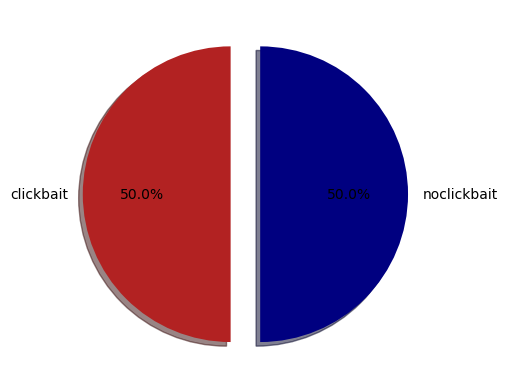

In [6]:
# Checking if our data
label_size = [data['binary_label'].sum(),len(data['binary_label'])-data['binary_label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['clickbait','noclickbait'],autopct='%1.1f%%')

## Train-test-split

In [7]:
# Text Columns

text_judul = data['title'].values.tolist()
text_isi = data['content'].values.tolist()

# merge title and content
text_combined = text_judul + text_isi

In [8]:
# Data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       1600 non-null   object
 1   date          1600 non-null   object
 2   title         1600 non-null   object
 3   label         1600 non-null   object
 4   binary_label  1600 non-null   uint8 
dtypes: object(4), uint8(1)
memory usage: 51.7+ KB


In [9]:
# Process Dataset
from sklearn.preprocessing import LabelBinarizer

X = data[['title', 'content']].values
y = data['binary_label'].values

# Fit transform train validation
lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

# Train-validation-Test set split 80:20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
# print(X_train, '\n')
# print(y_train)

In [10]:
print(X.shape)
print(y.shape)

(1600, 2)
(1600,)


In [11]:
print(X_test[1])
print(y_test[1])

['SOSOK Jenderal Surojo Bimantoro, Mantan Kapolri yang Pernah Melawan Perintah Presiden Gus Dur'
 'SURYA.co.id - Inilah sosok Jenderal Surojo Bimantoro, mantan Kapolri yang pernah melawan perintah Presiden Abdurrahman Wahid atau Gus Dur.Jenderal Surojo merupakan Kapolri ke-16 yang pernah terlibat konflik dengan Presiden Gus\xa0Dur.Bahkan, gara-gara konflik Surojo\xa0Bimantoro dan Gus\xa0Dur membuat DPR RI turun tangan.Konflik berawal saat Gus\xa0Dur mengganti Jenderal Surojo\xa0Bimantoro dengan Jenderal Polisi Chairuddin Ismail sebagai Kapolri.Saat itu, masa kepemimpinan Suroyo Bimantoro terjadi polemik kekisruhan di tubuh Polri.Presiden Gus\xa0Dur kemudian dikabarkan "memecat" Bimantoro dan mengangkat Chairuddin tanpa persetujuan parlemen.Seperti dilansir dari Tribun Timur dalam artikel \'Ingat Jenderal Surojo Bimantoro? Kapolri Berani Lawan Presiden Gus Dur, Disuruh Mundur Tapi Menolak\'.Kisruh pun terjadi di dalam internal Polri.Padahal, Bimantoro baru menjabat 1 tahun dua bulan.Mer

In [12]:
X_train[0]

array(['Pulihkan Ekonomi Sektor Pertanian, Pemkab Nganjuk Fasilitasi Pameran Produk Unggulan Tani',
       'SURYA.CO.ID, NGANJUK - Dinas Pertanian (Disperta) Kabupaten Nganjuk menggulirkan pameran dan bazar khusus produk unggulan tani. Kegiatan tersebut menjadi salah satu kegiatan dalam upaya membangkitkan kembali sektor perekonomian dari hasil pertanian, setelah berakhirnya pandemi Covid-19.Plt Bupati Nganjuk, H Marhaen Djumadi mengatakan, perekonomian merupakan salah satu sektor penting dalam membangun kesejahteraan masyarakat. Di mana sektor pertanian memang paling luas dan eksis dalam mendukung pertumbuhan ekonomi Indonesia, khususnya di Kabupaten Nganjuk."Melalui bazar produk tani ini diharapkan semakin mendekatkan produk tani kepada konsumen, sehingga meningkatkan perekonomian di sektor pertanian," ujar Marhaen, Kamis (10/10/2022).Dikatakan Marhaen, dengan terobosan berupa bazar produk tani ini diharapkan kelompok tani, Gapoktan dan KWT lebih produktif dalam menunjukkan karya dan

## Model Training

In [13]:
# Text Vectorization

max_features = 2000
max_len = 100

vectorize_layer = layers.TextVectorization(
                        max_tokens=max_features,
                        output_mode='int',
                        output_sequence_length=max_len,
                        name='Text_Vectorization'
                    )

vectorize_layer.adapt(text_combined)

In [14]:
# Model

model = models.Sequential([
    layers.Input(shape=(2,), dtype=tf.dtypes.string, name='Input'),
    layers.Reshape((2,1), name='Reshape'),
    vectorize_layer,
    layers.Embedding(input_dim=max_features, output_dim=64, name='Embedding'),
    layers.Flatten(name='Flatten'),
    layers.Dense(64, activation='relu', name='Dense'),
    layers.Dense(1, activation='sigmoid', name='Output')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Reshape (Reshape)           (None, 2, 1)              0         
                                                                 
 Text_Vectorization (TextVec  (None, 2, 100)           0         
 torization)                                                     
                                                                 
 Embedding (Embedding)       (None, 2, 100, 64)        128000    
                                                                 
 Flatten (Flatten)           (None, 12800)             0         
                                                                 
 Dense (Dense)               (None, 64)                819264    
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                        

In [16]:
# Layers Models

image_model = keras.utils.plot_model(model, show_shapes=True)
image_model

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
# Compile

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=METRICS,
)

In [18]:
# Train

tf.config.run_functions_eagerly(True)
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
hist = model.fit(
    X_train,
    y_train,
    epochs=20,
    callbacks = [early_stop],
    validation_split=0.2
)

Epoch 1/20


C:\Users\Aprilia\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 4s 129ms/step - loss: 0.6956 - accuracy: 0.5205 - precision: 0.6147 - recall: 0.1298 - val_loss: 0.6841 - val_accuracy: 0.5430 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 4s 137ms/step - loss: 0.6643 - accuracy: 0.5488 - precision: 1.0000 - recall: 0.1047 - val_loss: 0.6630 - val_accuracy: 0.7109 - val_precision: 0.9057 - val_recall: 0.4103
Epoch 3/20
32/32 [==============================] - 4s 140ms/step - loss: 0.5411 - accuracy: 0.8379 - precision: 0.9581 - recall: 0.7093 - val_loss: 0.5388 - val_accuracy: 0.7539 - val_precision: 0.6985 - val_recall: 0.8120
Epoch 4/20
32/32 [==============================] - 4s 136ms/step - loss: 0.2454 - accuracy: 0.9404 - precision: 0.9452 - recall: 0.9360 - val_loss: 0.4368 - val_accuracy: 0.8047 - val_precision: 0.8252 - val_recall: 0.7265
Epoch 5/20
32/32 [==============================] - 4s 138ms/step - loss: 0.0758 - accuracy: 0.9912 - preci

## Model Performance

In [19]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 53ms/step - loss: 0.3806 - accuracy: 0.8562 - precision: 0.8758 - recall: 0.8443


[0.38060927391052246,
 0.856249988079071,
 0.8757764101028442,
 0.8443113565444946]

In [20]:
input_judul1 = [["atlet jatim sunoto terminator tempur international championship blood berita"],
                ["KRITERIA Calon Persebaya Surabaya Sempat Dibocorkan Azrul Ananda Petinggi PSIS Termasuk"],
                ["gudang penimbunan solar tuban digerebek polisi kembangkan jaringan pelaku"],
                ["FERDY SAMBO Menangis Emosi Saat Perintahkan Tembak Brigadir Bripka Menolak Faktanya"]
                ]
input_isi1 = [["surabayasurya surabaya sunoto atlet jawa timur berlaga pertarungan kelas dunia championship blood pertarungan seni bela campuran martial kelas dunia hadir layar kaca jumat februari sunoto menghadapi juara myanmar tial thang tiket kelas bantam championship sunoto juara indonesia jawa timur diakui kemampuannya komunitas indonesia sunoto menjalani debut profesionalnya tampil championship julukan terminator mempertajam kemampuannya meraih kemenangan kariernya championship menjalani pemusatan latihan bali atlet tanah deddy sudarijanto hadirnya laga championship blood layar kaca indonesia upaya mengembangkan tontonan menarik menghibur mendorong potensi olahraga bela indonesia kemampuan atlet atlet kelas dunia inspirasi motivasi atlet olahraga bela indonesia kompetisi dunia championship blood kali indonesia memiliki wakilnya bertarung level deddy kamis kompetisi seni bela campuran martial championship dikenal nama fighting championship championship ajang pengembangan atlet beladiri berbasis singapura diluncurkan juli sunoto bertekad mengerahkan kemampuannya menghadapi tial thang ajang championship blood singapore indoor stadium atlet lawannya myanmar berlatih sanford amerika serikat bernaungnya petarung dunia aung sang brandon vera vitor belfort michael chandler beralih tial thang juara gulat myanmar berhasil mengoleksi ratusan kemenangan berkiprah negaranya sunoto gentar takut makan nasi makan nasi kecuali makan kemenyan sunoto"],
                ["SURYA Azrul Ananda ternyata sempat membocorkan kriteria calon Persebaya Surabaya yang akan menggantikannya diungkapkan anak Dahlan Iskan dalam tayangan channel youtube Persebaya Surabaya Saat Azrul menyatakan mundur dari jabatan Persebaya Surabaya Jumat hadapan Bonek awak media Bocoran terkait kriteria calon Persebaya Surabaya terungkap saat Azrul mendapat pertanyaan bagaimana nasib Persebaya siapa yang memimpin nantinya Baca juga SOSOK Pengganti Azrul Ananda Persebaya Surabaya Terjawab Petinggi PSIS Semarang Diisukan MerapatAzrul menyatakan tidak akan meninggalkan Persebaya Surabaya begitu saja akan memastikan Persebaya Surabaya tetap Surabaya sebisa mungkin stakeholdernya adalah orang Surabaya Spiritnya akan sama bahwa harus tetap Surabaya tidak boleh kemana mana harus dikawal sebisa mungkin stakeholdernya harus orang Surabaya ujar Azrul tegas Berikut video selengkapnya Petinggi PSIS Termasuk Seperti diketahui Azrul Ananda telah memutuskan untuk mundur dari jabatan Persebaya Surabaya pada Jumat lalu Meski telah mundur tetapi anak dari Dahlan Iskan masih akan bertanggung jawab hingga Liga berakhir Sosok pengganti Azrul Ananda Persebaya Surabaya masih belum diketahui hingga saat Kabar beredar Petinggi PSIS Semarang Junianto dikaitkan sebagai sosok pengganti Azrul Ananda tersebut muncul usai putranya yaitu Fardhan Nandana menyebutkan bahwa Junianto telah ditunggu oleh para Bonek "],
                ["surya tuban satreskrim polres tuban menggerebek gudang penimbunan solar desa minohorejo kecamatan widang kabupaten tuban penggerebekan polisi mengamankan kendaraan drum berisi solar bersubsidi liter kepala satuan reserse kriminal polres tuban gananta dikonfirmasi pembongkaran gudang solar membenarkan terkait penggerebekan solar kamis kemarin dikonfirmasi selasa perwira penemuan gudang penimbun jenis solar subsidi dasar laporan masyarakat diselidiki penyidik pengembangan mengungkap jaringannya disinggung sosok pelaku gananta proses penyelidikan kembangkan barang bukti amankan mobil nopol drum berisi solar drum drum pungkasnya berdasarkan data dihimpun modus pelaku penimbunan solar membawa surat desa keterangan kebutuhan pertanian stasiun pengisian bahan bakar spbu ambil solar spbu gesing kecamatan semanding spbu plumpang pelaku mengambil solar kali menyuruh orang membawa jeriken kapasitas liter solar dibeli ditampung gudang alasan dijual petani diduga dijual proyek pabrik membutuhkan"],
                ["SURYA Terungkap sederet fakta tentang Bripka mengaku menolak perintah Ferdy Sambo untuk menembak Brigadir Menurut Bripka Ferdy Sambo menangis emosi saat melontarkan perintah tersebut Bripka juga menyebut Ferdy Sambo sempat dalam kondisi terguncang hingga menangis dibeberkan oleh Pengacara Bripka Ricky Rizal Erman Umar berdasarkan kesaksian kliennya Baca juga Alasan Brigadir Khianati Ferdy Sambo Peran Istri Terima Dijerat Pembunuhan BerencanaBerikut rangkuman fakta selengkapnya melansir dari Tribunnews dalam artikel Bripka Tolak Permintaan Ferdy Sambo untuk Tembak Brigadir Kini Balik Arah dari Skenario Ferdy Samo nangis emosiPengacara Bripka Ricky Rizal Erman Umar mengungkap kesaksian kliennya saat dipanggil Ferdy Sambo ketika berada rumah pribadi Irjen Ferdy Sambo Jalan Saguling Jakarta Saat Ferdy Sambo bertanya kepada kepada Bripka mengenai yang terjadi Magelang Saguling dipanggil Dipanggil Ferdy Sambo tanya kejadian kejadian Magelang Kamu tahu enggak Enggak tahu dilecehkan pelecehan terhadap sambil nangis emosi Saya enggak tahu kata Erman Lobi Bareskrim Polri Jakarta Kamis Menurut Erman ruangan juga Putri Istri Ferdy Sambo juga mengatakan bahwa Yosua melakukan pelecehan terhadap dirinya kuat mentalKemudian saat Ferdy Sambo menanyakan langsung kepada Bripka Ricky kesanggupannya menembak Brigadir "]
                ]

#0
#1
#0
#1
pred1 = model.predict([input_judul1[0] + input_isi1[0]]
             )
pred2 = model.predict([input_judul1[1] + input_isi1[1]]
             )
pred3 = model.predict([input_judul1[2] + input_isi1[2]]
             )
pred4 = model.predict([input_judul1[3] + input_isi1[3]]
             )
print(pred1,pred2,pred3,pred4)

1/1 [==============================] - 0s 78ms/step
[[0.02616527]] [[0.85180074]] [[0.04999244]] [[0.96230227]]


In [23]:
train_dense_results = model.evaluate(X_train, np.asarray(y_train), verbose=2, batch_size=256)
valid_dense_results = model.evaluate(X_test, np.asarray(y_test), verbose=2, batch_size=256)
print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')

5/5 - 0s - loss: 0.1036 - accuracy: 0.9633 - precision: 0.9788 - recall: 0.9463 - 500ms/epoch - 100ms/step
2/2 - 0s - loss: 0.3806 - accuracy: 0.8562 - precision: 0.8758 - recall: 0.8443 - 172ms/epoch - 86ms/step
Train accuracy: 96.33
Valid accuracy: 85.62


10/10 [==============================] - 0s 24ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       153
           1       0.88      0.84      0.86       167

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



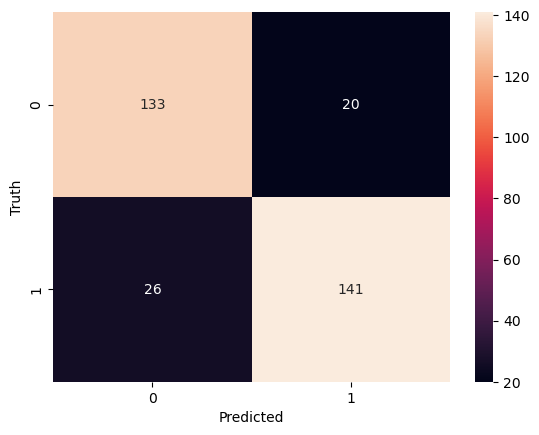

In [24]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_predicted)
cm 

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_predicted))

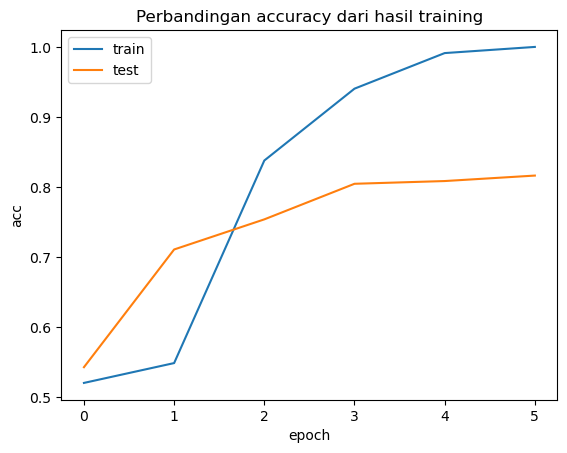

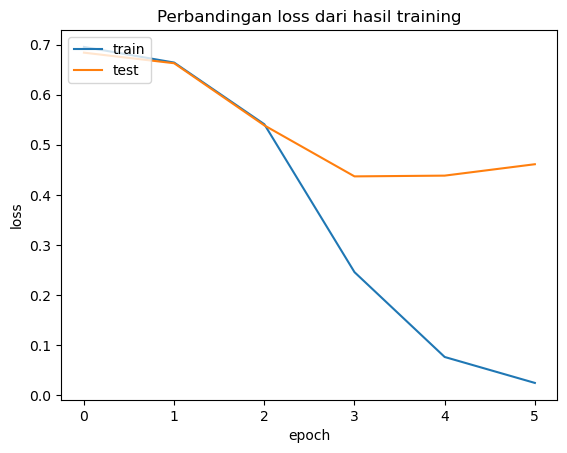

In [25]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Perbandingan accuracy dari hasil training')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Perbandingan loss dari hasil training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()